# Recurrent Neural Networks

In [38]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Time series forecasting

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/deep keras/data/cansim-0800020-eng-6674700030567901031.csv',
                 skiprows=6, skipfooter=9,
                 engine='python')
df

,Adjustments,Unadjusted,Seasonally adjusted
0,Jan-1991,12588862,15026890
1,Feb-1991,12154321,15304585
2,Mar-1991,14337072,15413591
3,Apr-1991,15108570,15293409
4,May-1991,17225734,15676083
...,...,...,...
308,Sep-2016,45528702,44534797
309,Oct-2016,44770113,45061618
310,Nov-2016,46285062,45141762
311,Dec-2016,50016137,44943929


In [41]:
from pandas.tseries.offsets import MonthEnd

In [42]:
df['Adjustments'] = pd.to_datetime(df['Adjustments']) + MonthEnd(1)
df = df.set_index('Adjustments')
df.head()

<ipython-input-42-79495905dec6>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Adjustments'] = pd.to_datetime(df['Adjustments']) + MonthEnd(1)


,Unadjusted,Seasonally adjusted
Adjustments,,
1991-01-31,12588862,15026890
1991-02-28,12154321,15304585
1991-03-31,14337072,15413591
1991-04-30,15108570,15293409
1991-05-31,17225734,15676083


<Axes: xlabel='Adjustments'>

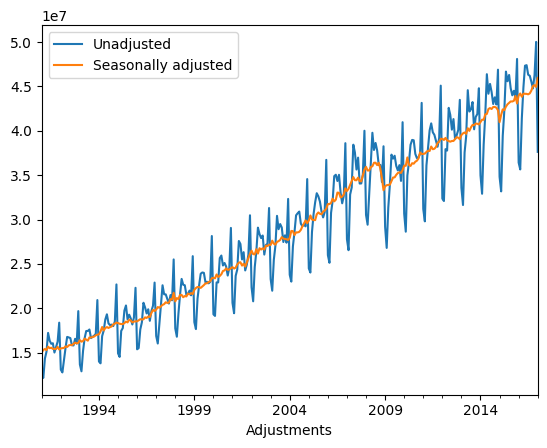

In [43]:
df.plot()

In [44]:
split_date = pd.Timestamp('01-01-2011')

In [45]:
train = df.loc[:split_date, ['Unadjusted']]
test = df.loc[split_date:, ['Unadjusted']]

In [46]:
test.shape

(73, 1)

In [47]:
train.shape

(240, 1)

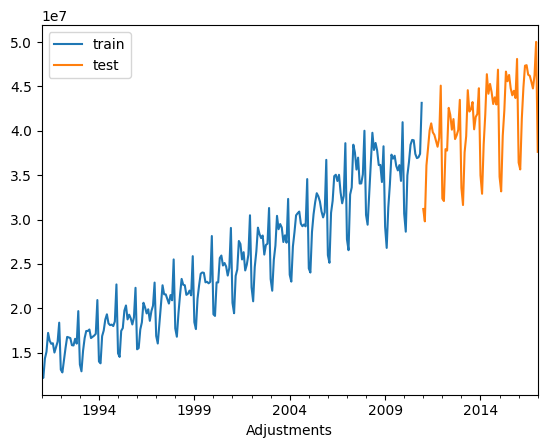

In [48]:
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])

In [49]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

In [50]:
train_sc[:]

array([[0.01402033],
       [0.        ],
       [0.0704258 ],
       [0.09531795],
       [0.16362761],
       [0.13514108],
       [0.12395846],
       [0.12617398],
       [0.09230917],
       [0.11139526],
       [0.13173822],
       [0.20091289],
       [0.03002688],
       [0.01999285],
       [0.06596369],
       [0.10983126],
       [0.14912986],
       [0.14718865],
       [0.14464787],
       [0.11898427],
       [0.11802682],
       [0.14222108],
       [0.12459168],
       [0.24290801],
       [0.04899091],
       [0.02408276],
       [0.09865054],
       [0.14480155],
       [0.17061844],
       [0.17067229],
       [0.17603636],
       [0.1449117 ],
       [0.14957943],
       [0.15381982],
       [0.16036484],
       [0.28308682],
       [0.05971347],
       [0.05306762],
       [0.15199345],
       [0.17230214],
       [0.21246911],
       [0.23131079],
       [0.1982186 ],
       [0.19187716],
       [0.19381714],
       [0.18857277],
       [0.20528237],
       [0.339

In [51]:
test_sc

array([[0.61423187],
       [0.56926634],
       [0.77259579],
       [0.83505683],
       [0.89993326],
       [0.92552046],
       [0.89302107],
       [0.88363094],
       [0.86220767],
       [0.84048091],
       [0.87180554],
       [1.06265011],
       [0.65198848],
       [0.6431242 ],
       [0.83176496],
       [0.82666946],
       [0.98182284],
       [0.95616179],
       [0.90265615],
       [0.94107108],
       [0.86841056],
       [0.88189991],
       [0.90152769],
       [1.01100691],
       [0.69112114],
       [0.6285977 ],
       [0.81975104],
       [0.8791154 ],
       [1.04612377],
       [0.96841925],
       [0.97644296],
       [1.00288811],
       [0.90392615],
       [0.94879721],
       [0.95953255],
       [1.05319955],
       [0.7364742 ],
       [0.66953725],
       [0.84874774],
       [0.95681131],
       [1.10426647],
       [1.03325855],
       [1.06896205],
       [1.03909791],
       [0.9957921 ],
       [1.0202471 ],
       [0.99420458],
       [1.120

In [52]:
X_train = train_sc[:-1]
y_train = train_sc[1:]

X_test = test_sc[:-1]
y_test = test_sc[1:]

### Fully connected predictor

In [53]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping

In [54]:
K.clear_session()

model = Sequential()
model.add(Dense(12, input_dim=1, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 12)                  │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              13 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37 (148.00 B)

 Trainable params: 37 (148.00 B)

 Non-trainable params: 0 (0.00 B)

In [55]:
early_stop = EarlyStopping(monitor='loss', verbose=1)

In [56]:
model.fit(X_train, y_train, epochs=200,
          batch_size=2, verbose=1,
          callbacks=[early_stop])

Epoch 1/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6368
Epoch 2/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1437
Epoch 3/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0505
Epoch 4/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0430
Epoch 5/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0309
Epoch 6/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0278
Epoch 7/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0280
Epoch 8/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0196
Epoch 9/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0179
Epoch 10/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0139
Epoch 11/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0172
Epoch 12/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0150
Epoch 13/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0107
Epoch 14/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0121
Epoch 15/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 0

In [57]:
y_pred = model.predict(X_test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


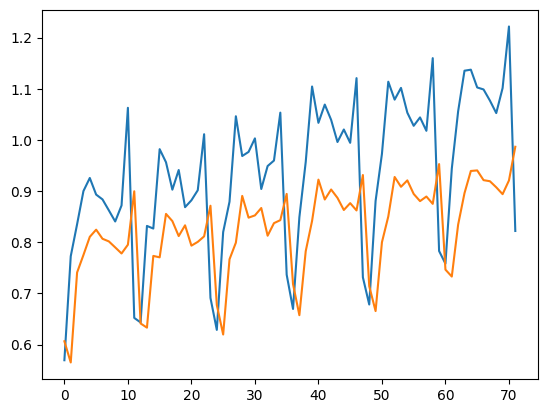

In [58]:
plt.plot(y_test)
plt.plot(y_pred)

### Recurrent predictor

In [59]:
from keras.layers import LSTM

In [60]:
X_train.shape

(239, 1)

In [61]:
y_test.shape

(72, 1)

In [62]:
X_test.shape

(72, 1)

In [63]:
y_train.shape

(239, 1)

In [64]:
#3D tensor with shape (batch_size, timesteps, input_dim)
X_train[:, None].shape

(239, 1, 1)

In [65]:
#3D tensor
X_train_t = X_train[:, None]
X_test_t = X_test[:, None]

In [66]:
X_train[:, None].shape

(239, 1, 1)

In [67]:
X_test[:, None].shape

(72, 1, 1)

In [68]:
# K.clear_session()
# model = Sequential()

# model.add(LSTM(6, input_dim=1))

# model.add(Dense(1))

# model.compile(loss='mean_squared_error', optimizer='adam')

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from tensorflow.keras import backend as K

K.clear_session()

model = Sequential()
model.add(Input(shape=(10, 1)))  # e.g., 10 timesteps, 1 feature
model.add(LSTM(6))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 6)                   │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 199 (796.00 B)

 Trainable params: 199 (796.00 B)

 Non-trainable params: 0 (0.00 B)

In [70]:
model.fit(X_train_t, y_train,
          epochs= 3, batch_size=128,
          callbacks=[early_stop])

Epoch 1/3
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2648
Epoch 2/3
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2625
Epoch 3/3
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2723


In [71]:
y_test_pred = model.predict(X_test_t)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


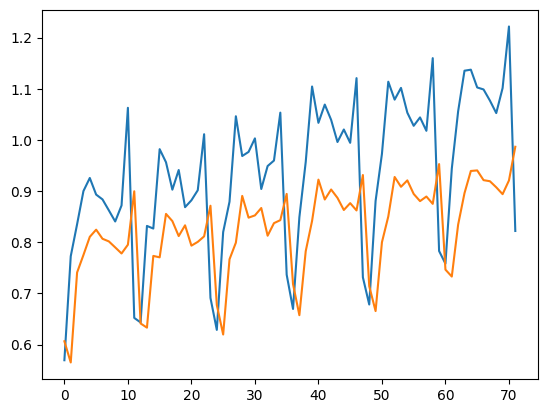

In [72]:
plt.plot(y_test)
plt.plot(y_pred)